In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('project standard-table.csv', skiprows=6)
df.shape

(200, 42)

In [38]:
df.columns

Index(['[run number]', 'rice-seed-cost', 'drought-prob',
       'base-maintenance-cost', 'w_sc', 'w_def', 'base-share', 'num-farmers',
       'w_bal', 'base-theft', 'detection-likelihood', 'cotton-price',
       'mustard-price', 'theft_w_vwater', 'crop-stage-variance', 'theft_w_f',
       'wheat-price', 'w_str', 'cotton-seed-cost', 'heavy-rain-prob',
       'rice-price', 'base-living-cost-month', 'theft_w_sc', 'w_f',
       'mustard-seed-cost', 'flood-prob', 'theft_w_vsc', 'base-flow',
       'theft_w_str', 'wheat-seed-cost', 'water-randomness',
       'base-water-cost-per-unit', 'theft_w_def', '[step]', 'total-land',
       'mean [wealth] of farmers', 'standard-deviation [wealth] of farmers',
       'theft-volume', 'trade-volume', 'mean [strength] of friendships',
       'mean [social-credit] of farmers', 'report-all-farmer-data'],
      dtype='object')

In [39]:
df = df.drop(columns=df.columns[:34])
df

,total-land,mean [wealth] of farmers,standard-deviation [wealth] of farmers,theft-volume,trade-volume,mean [strength] of friendships,mean [social-credit] of farmers,report-all-farmer-data
0,170,1.335085e+07,1.631064e+07,6.765398,407.061744,0.596909,4.478904,[[0 3 1.8150351135759253E7 -0.4273965866597678...
1,175,6.388214e+06,1.147662e+07,16.379935,313.112316,0.719864,5.299148,[[0 3 1.1799356805924745E7 -2.0109839004490873...
2,186,3.001962e+06,1.209478e+07,34.092076,290.888447,0.817454,5.446930,[[0 3 4962120.756602209 2.6395629035827506 0 2...
3,148,2.469323e+07,1.593829e+07,3.558741,237.123569,0.538874,4.112289,[[0 3 1.9226848639221177E7 1.486822861784931 0...
4,213,-5.301752e+06,4.191808e+06,566.138036,219.642764,0.772508,-4.616184,[[0 4 78654.41693052185 -10 0 30 [10 0 0 11] [...
...,...,...,...,...,...,...,...,...
195,204,-3.265046e+06,6.591195e+06,99.708262,254.648493,0.843692,4.367949,[[0 7 1.1501667892113697E7 -2.0199222418426257...
196,203,-5.083469e+06,4.085579e+06,171.159063,258.897713,0.813131,1.086876,[[0 3 3266519.632254542 -10.922486261440472 0 ...
197,215,-5.310951e+06,5.832332e+06,284.862291,318.074809,0.815121,-0.974240,[[0 3 1993228.242720004 -10.406314444797989 0 ...
198,214,-4.388557e+06,7.354998e+06,366.549085,226.611659,0.845380,-3.727870,[[0 16 3.034728727500226E7 -10.299692832980453...


In [40]:
df["report-all-farmer-data"] = df["report-all-farmer-data"].str.replace(" ", ",")
import ast
df_farmer_data = pd.DataFrame({"parsed_farmer_data" : df["report-all-farmer-data"].apply(ast.literal_eval)})
df_exploded = df_farmer_data.explode("parsed_farmer_data").reset_index(drop=True)
df_exploded

,parsed_farmer_data
0,"[0, 3, 18150351.135759253, -0.4273965866597678..."
1,"[1, 3, 10721362.110316599, 1.890884891578473, ..."
2,"[2, 12, 73890103.5434387, 2.6044006401821003, ..."
3,"[3, 5, 32071703.559562515, 1.6823051024111022,..."
4,"[4, 5, 28396904.02791151, 1.9311809459085154, ..."
...,...
6595,"[28, 3, -5752465.528622553, -10, 51, 73, [10, ..."
6596,"[29, 29, -20785706.888712455, -10, 733, 62, [1..."
6597,"[30, 10, -13201663.131548688, -10, 197, 117, [..."
6598,"[31, 3, -6052406.758455995, 1.0014814353890076..."


In [41]:
FARMER_COLUMNS = [
    'ycor_agent', 'land-size_agent', 'wealth_agent', 
    'social-credit_agent', 'times-robbed_agent', 'num-shares_agent', 
    'crops-used_agent', 'strategies-used_agent'
]

farmer_attributes = pd.Series(df_exploded['parsed_farmer_data'])

df_farmer_details = pd.DataFrame(
    farmer_attributes.tolist(), 
    columns=FARMER_COLUMNS
)

df_farmer_details

# build sim_id mapping (df_farmer_data contains the list-of-farmers per simulation)
sim_counts = df_farmer_data['parsed_farmer_data'].apply(len).values
sim_ids = np.repeat(df.index.values, sim_counts)  # df.index corresponds to simulation rows
df_farmer_details['sim_id'] = sim_ids

Correlation of total_land with simulation metrics:
 total-land vs mean [wealth] of farmers: -0.8679
 total-land vs standard-deviation [wealth] of farmers: -0.6744
 total-land vs theft-volume: 0.8729
 total-land vs trade-volume: -0.4560
 total-land vs mean [strength] of friendships: 0.1605
 total-land vs mean [social-credit] of farmers: -0.8048

Correlation between theft-volume and trade-volume: -0.3615


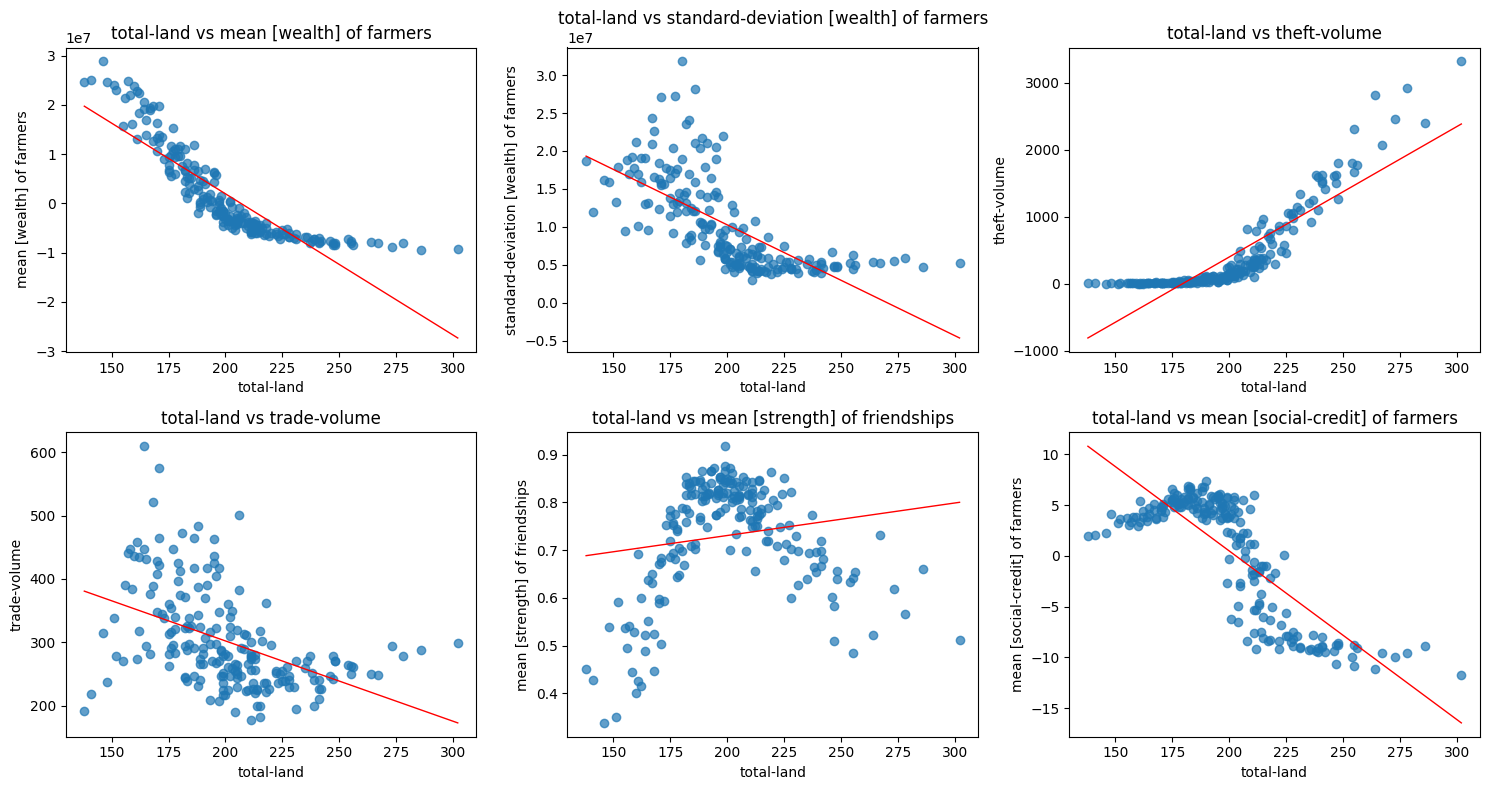

In [ ]:
# Correlations of total land with simulation-level metrics
metrics = [
    'mean [wealth] of farmers',
    'standard-deviation [wealth] of farmers',
    'theft-volume',
    'trade-volume',
    'mean [strength] of friendships',
    'mean [social-credit] of farmers'
]

print("Correlation of total_land with simulation metrics:")
for m in metrics:
    print(f" total-land vs {m}: {df['total-land'].corr(df[m]):.4f}")

# Scatter plots: total-land vs each metric (2x3)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()
for ax, m in zip(axes, metrics):
    ax.scatter(df['total-land'], df[m], alpha=0.7)
    # simple linear fit line
    try:
        coef = np.polyfit(df['total-land'], df[m], 1)
        xs = np.linspace(df['total-land'].min(), df['total-land'].max(), 50)
        ax.plot(xs, np.polyval(coef, xs), color='red', lw=1)
    except Exception:
        pass
    ax.set_xlabel('total-land')
    ax.set_ylabel(m)
    ax.set_title(f"total-land vs {m}")
plt.tight_layout()
plt.show()


Correlation between theft-volume and trade-volume: -0.3615


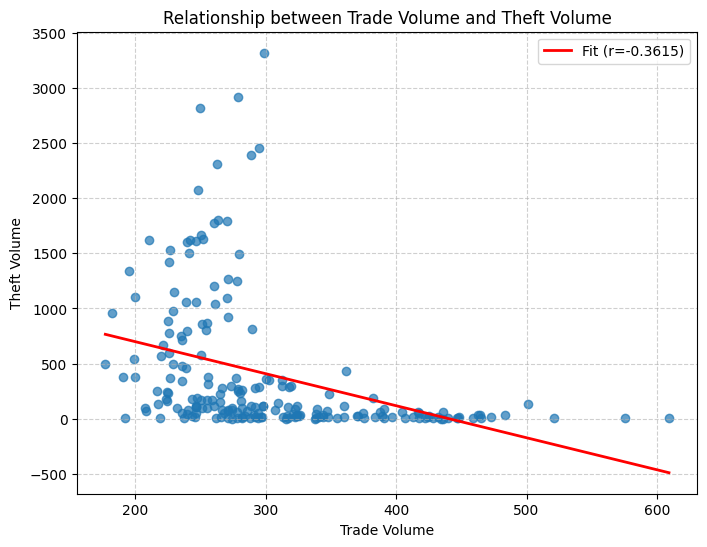

In [58]:
# Correlations of total land with simulation-level metrics
metrics = [
    'mean [wealth] of farmers',
    'standard-deviation [wealth] of farmers',
    'theft-volume',
    'trade-volume',
    'mean [strength] of friendships',
    'mean [social-credit] of farmers'
]

print("\nCorrelation between theft-volume and trade-volume:",
      f"{df['theft-volume'].corr(df['trade-volume']):.4f}")

fig_theft_trade, ax_theft_trade = plt.subplots(figsize=(8, 6))

# Scatter plot of theft-volume (Y-axis) vs trade-volume (X-axis)
ax_theft_trade.scatter(df['trade-volume'], df['theft-volume'], alpha=0.7)

# Add a simple linear fit line for context
try:
    # Fit the line: Y = mX + c, where X is trade-volume and Y is theft-volume
    coef = np.polyfit(df['trade-volume'], df['theft-volume'], 1)
    
    # Create x-values for the line plot
    xs = np.linspace(df['trade-volume'].min(), df['trade-volume'].max(), 50)
    
    # Plot the fit line
    ax_theft_trade.plot(xs, np.polyval(coef, xs), color='red', lw=2, 
                        label=f'Fit (r={df["theft-volume"].corr(df["trade-volume"]):.4f})')
except Exception:
    pass

# Set labels and title
ax_theft_trade.set_xlabel('Trade Volume')
ax_theft_trade.set_ylabel('Theft Volume')
ax_theft_trade.set_title('Relationship between Trade Volume and Theft Volume')
ax_theft_trade.grid(True, linestyle='--', alpha=0.6)
ax_theft_trade.legend()

# Display both figures
plt.show()


Per-farmer correlations:
 ycor_agent vs wealth_agent: -0.3780
 ycor_agent vs social-credit_agent: 0.4509
 ycor_agent vs times-robbed_agent: 0.1245
 ycor_agent vs num-shares_agent: 0.7127
 land-size_agent vs wealth_agent: 0.0480
 land-size_agent vs social-credit_agent: -0.0501
 land-size_agent vs times-robbed_agent: 0.5734
 land-size_agent vs num-shares_agent: -0.0395


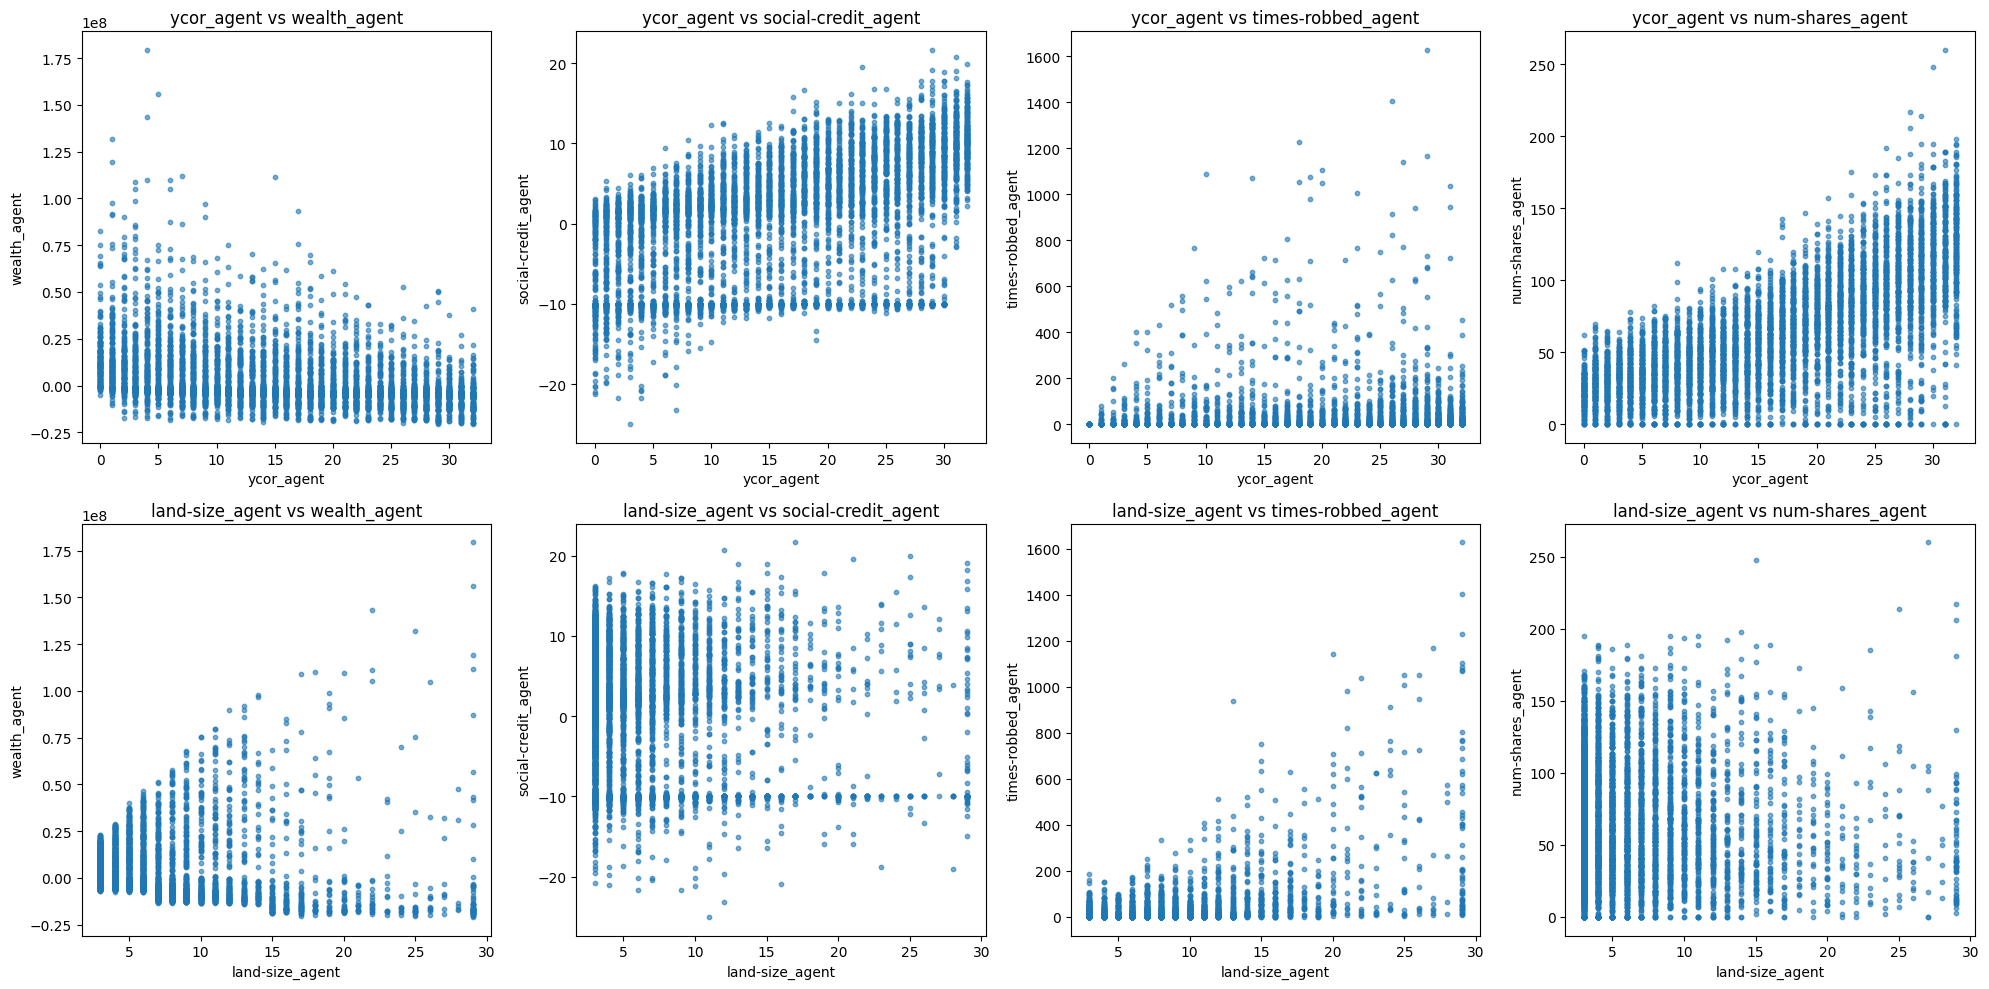

In [ ]:
# total land per simulation and attach to df
total_land_per_sim = df_farmer_details.groupby('sim_id')['land-size_agent'].sum()
df['total_land'] = df.index.map(total_land_per_sim.to_dict())

# Per-farmer correlations: ycor and land-size with wealth, social-credit, times-robbed, num-shares
farmer_vars = ['ycor_agent', 'land-size_agent']
farmer_targets = ['wealth_agent', 'social-credit_agent', 'times-robbed_agent', 'num-shares_agent']

print("\nPer-farmer correlations:")
for v in farmer_vars:
    for t in farmer_targets:
        print(f" {v} vs {t}: {df_farmer_details[v].corr(df_farmer_details[t]):.4f}")

# Scattergrid for per-farmer relationships (two rows: ycor and land-size)
fig, axes = plt.subplots(2, len(farmer_targets), figsize=(5*len(farmer_targets), 10))
for i, v in enumerate(farmer_vars):
    for j, t in enumerate(farmer_targets):
        ax = axes[i, j]
        ax.scatter(df_farmer_details[v], df_farmer_details[t], s=10, alpha=0.6)
        ax.set_xlabel(v)
        ax.set_ylabel(t)
        ax.set_title(f"{v} vs {t}")
plt.tight_layout()
plt.show()



/tmp/ipykernel_5360/1447159636.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()


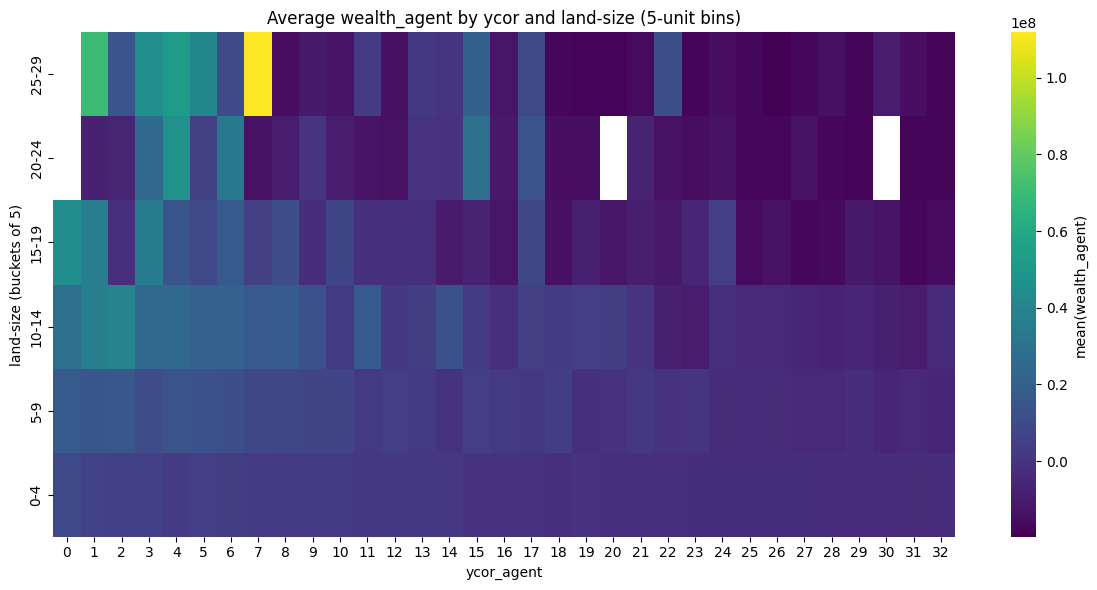

/tmp/ipykernel_5360/1447159636.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()


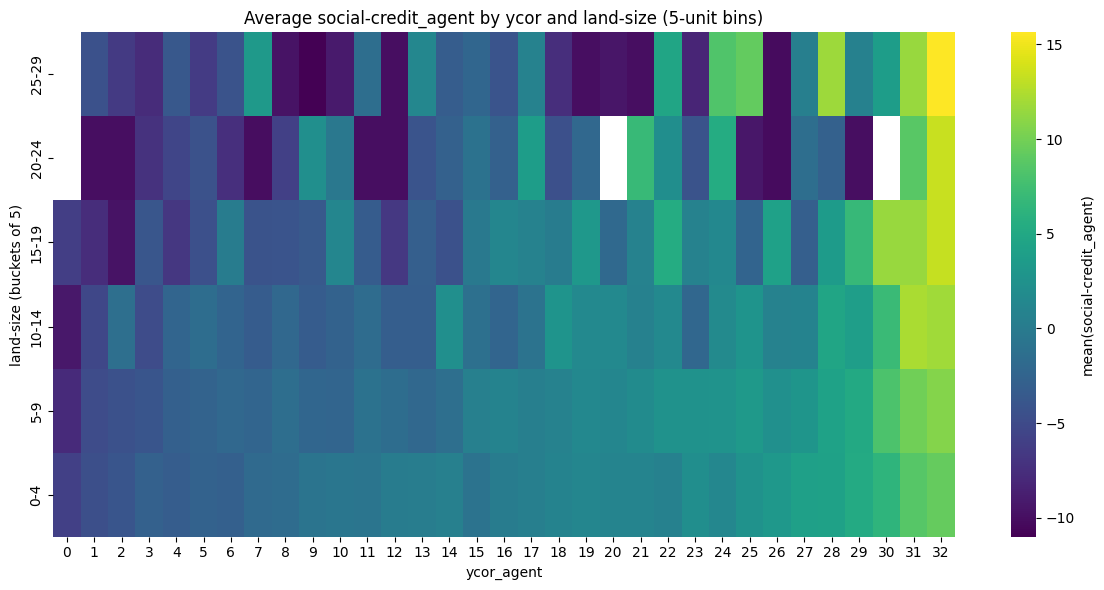

/tmp/ipykernel_5360/1447159636.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()


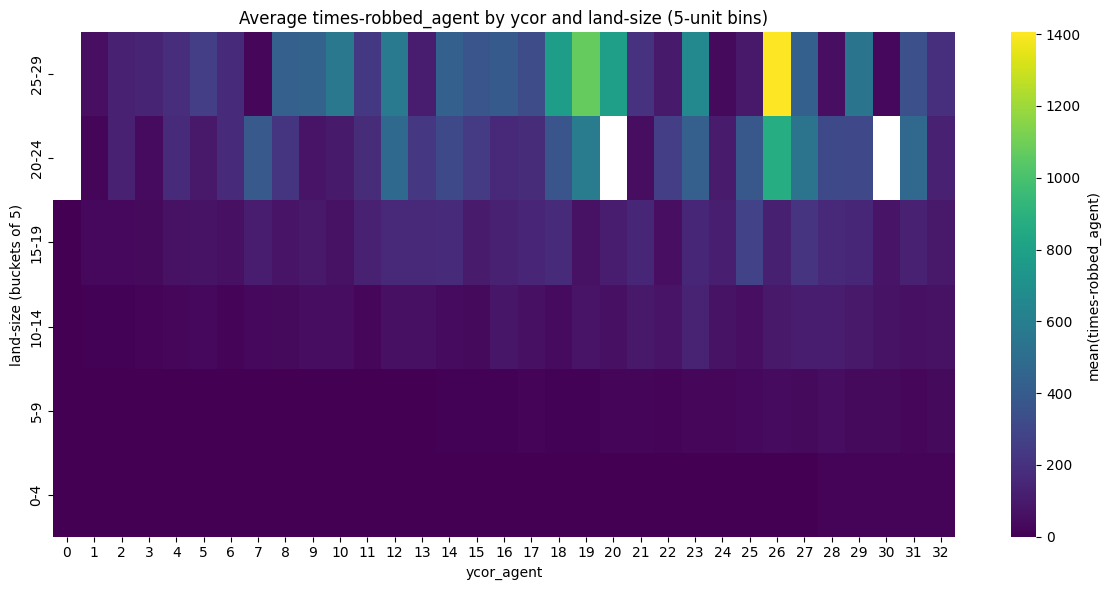

/tmp/ipykernel_5360/1447159636.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()


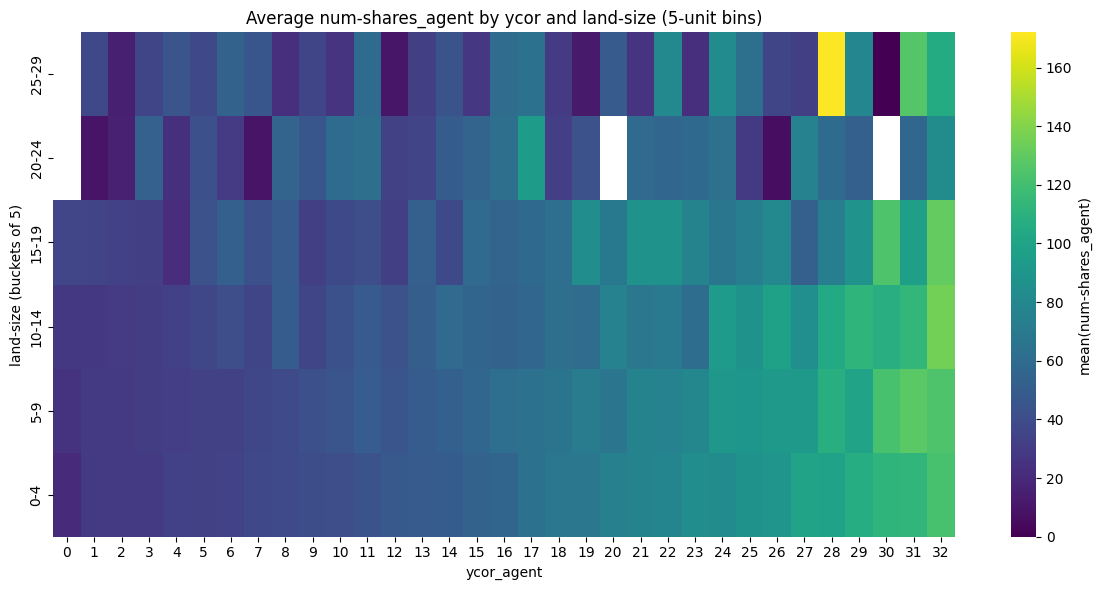

In [46]:
# 2D binned heatmap: x = ycor_agent, y = land-size_agent buckets (width=5), color = mean(attribute)
farmer_targets = ['wealth_agent', 'social-credit_agent', 'times-robbed_agent', 'num-shares_agent']

for attribute in farmer_targets:
    # Create land-size bins of width 5
    min_land = int(df_farmer_details['land-size_agent'].min())
    max_land = int(df_farmer_details['land-size_agent'].max())
    bins = list(range((min_land // 5) * 5, ((max_land // 5) + 2) * 5, 5))
    labels = [f"{b}-{b+4}" for b in bins[:-1]]
    df_farmer_details['land_bin'] = pd.cut(df_farmer_details['land-size_agent'], bins=bins, labels=labels, right=False, include_lowest=True)

    # Group by land-bin and ycor and compute mean of the attribute
    grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[attribute].mean().reset_index()

    # Pivot to wide format: rows = land_bin, cols = ycor_agent
    pivot = grp.pivot(index='land_bin', columns='ycor_agent', values=attribute)

    # Sort rows (land bins) and columns (ycor) for consistent plotting
    pivot = pivot.reindex(labels)  # ensure all land bins are present in order
    try:
        # If ycor_agent is numeric, sort columns numerically
        sorted_cols = sorted([c for c in pivot.columns if not pd.isna(c)])
        pivot = pivot[sorted_cols]
    except Exception:
        pass

    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, max(6, len(pivot) * 0.35)))
    ax = sns.heatmap(pivot, cmap='viridis', cbar_kws={'label': f'mean({attribute})'}, annot=False, fmt='.2f')
    ax.set_xlabel('ycor_agent')
    ax.set_ylabel('land-size (buckets of 5)')
    ax.set_title(f'Average {attribute} by ycor and land-size (5-unit bins)')

    # By default heatmap places first row at top; invert so smallest land at bottom
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()


Per-farmer correlations: ycor/land-size vs crop positions
 ycor_agent vs crop_0: 0.4199
 ycor_agent vs crop_1: -0.4199
 ycor_agent vs crop_2: -0.0711
 ycor_agent vs crop_3: 0.0711
 land-size_agent vs crop_0: 0.0430
 land-size_agent vs crop_1: -0.0430
 land-size_agent vs crop_2: -0.0134
 land-size_agent vs crop_3: 0.0134


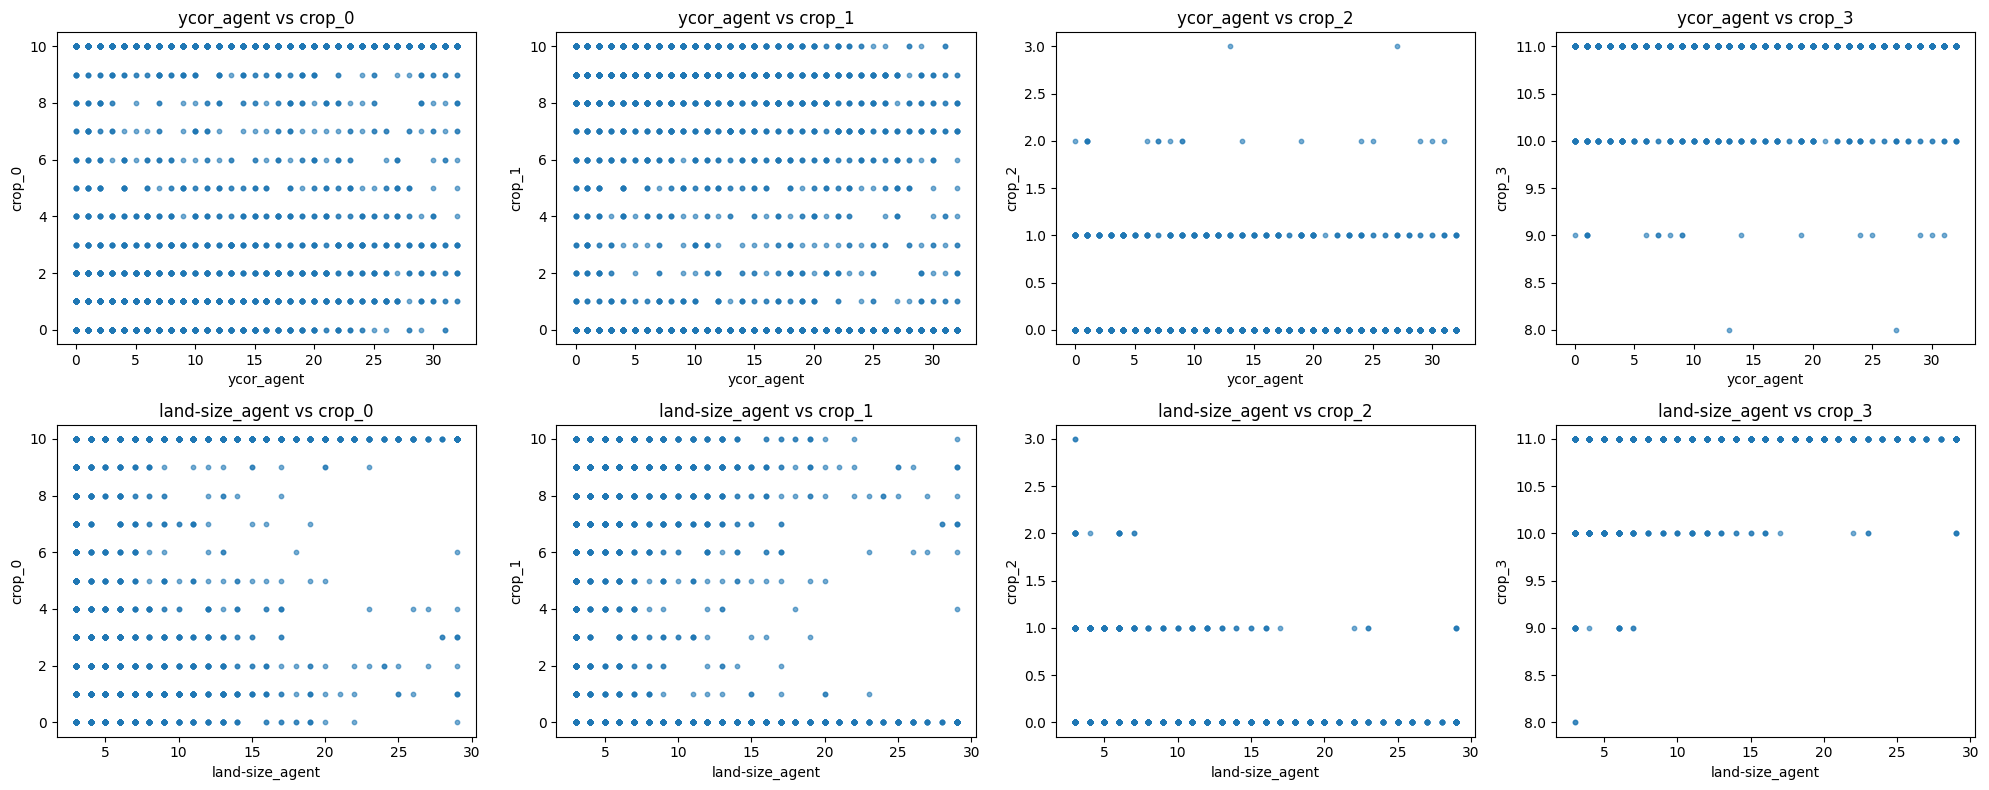

In [48]:
# --- Crop usage per-position analysis (4 positions) ---
# Expand crops-used_agent (each is a list of 4 values) into four columns and attach to df_farmer_details
crop_cols = [f'crop_{i}' for i in range(4)]
crops_expanded = pd.DataFrame(df_farmer_details['crops-used_agent'].tolist(), columns=crop_cols).fillna(0).astype(int)
for c in crop_cols:
    df_farmer_details[c] = crops_expanded[c]

# Per-farmer correlations: ycor and land-size with each crop position
farmer_vars = ['ycor_agent', 'land-size_agent']
print('\nPer-farmer correlations: ycor/land-size vs crop positions')
for v in farmer_vars:
    for c in crop_cols:
        corr = df_farmer_details[v].corr(df_farmer_details[c])
        print(f" {v} vs {c}: {corr:.4f}")

# Scattergrid: 2 rows (ycor, land-size) x 4 cols (crop_0..crop_3)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, len(crop_cols), figsize=(5*len(crop_cols), 8))
for i, v in enumerate(farmer_vars):
    for j, c in enumerate(crop_cols):
        ax = axes[i, j] if len(crop_cols) > 1 else axes[i]
        ax.scatter(df_farmer_details[v], df_farmer_details[c], s=10, alpha=0.6)
        ax.set_xlabel(v)
        ax.set_ylabel(c)
        ax.set_title(f"{v} vs {c}")
plt.tight_layout()
plt.show()

/tmp/ipykernel_5360/3960243214.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[c].mean().reset_index()
/tmp/ipykernel_5360/3960243214.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[c].mean().reset_index()
/tmp/ipykernel_5360/3960243214.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp 

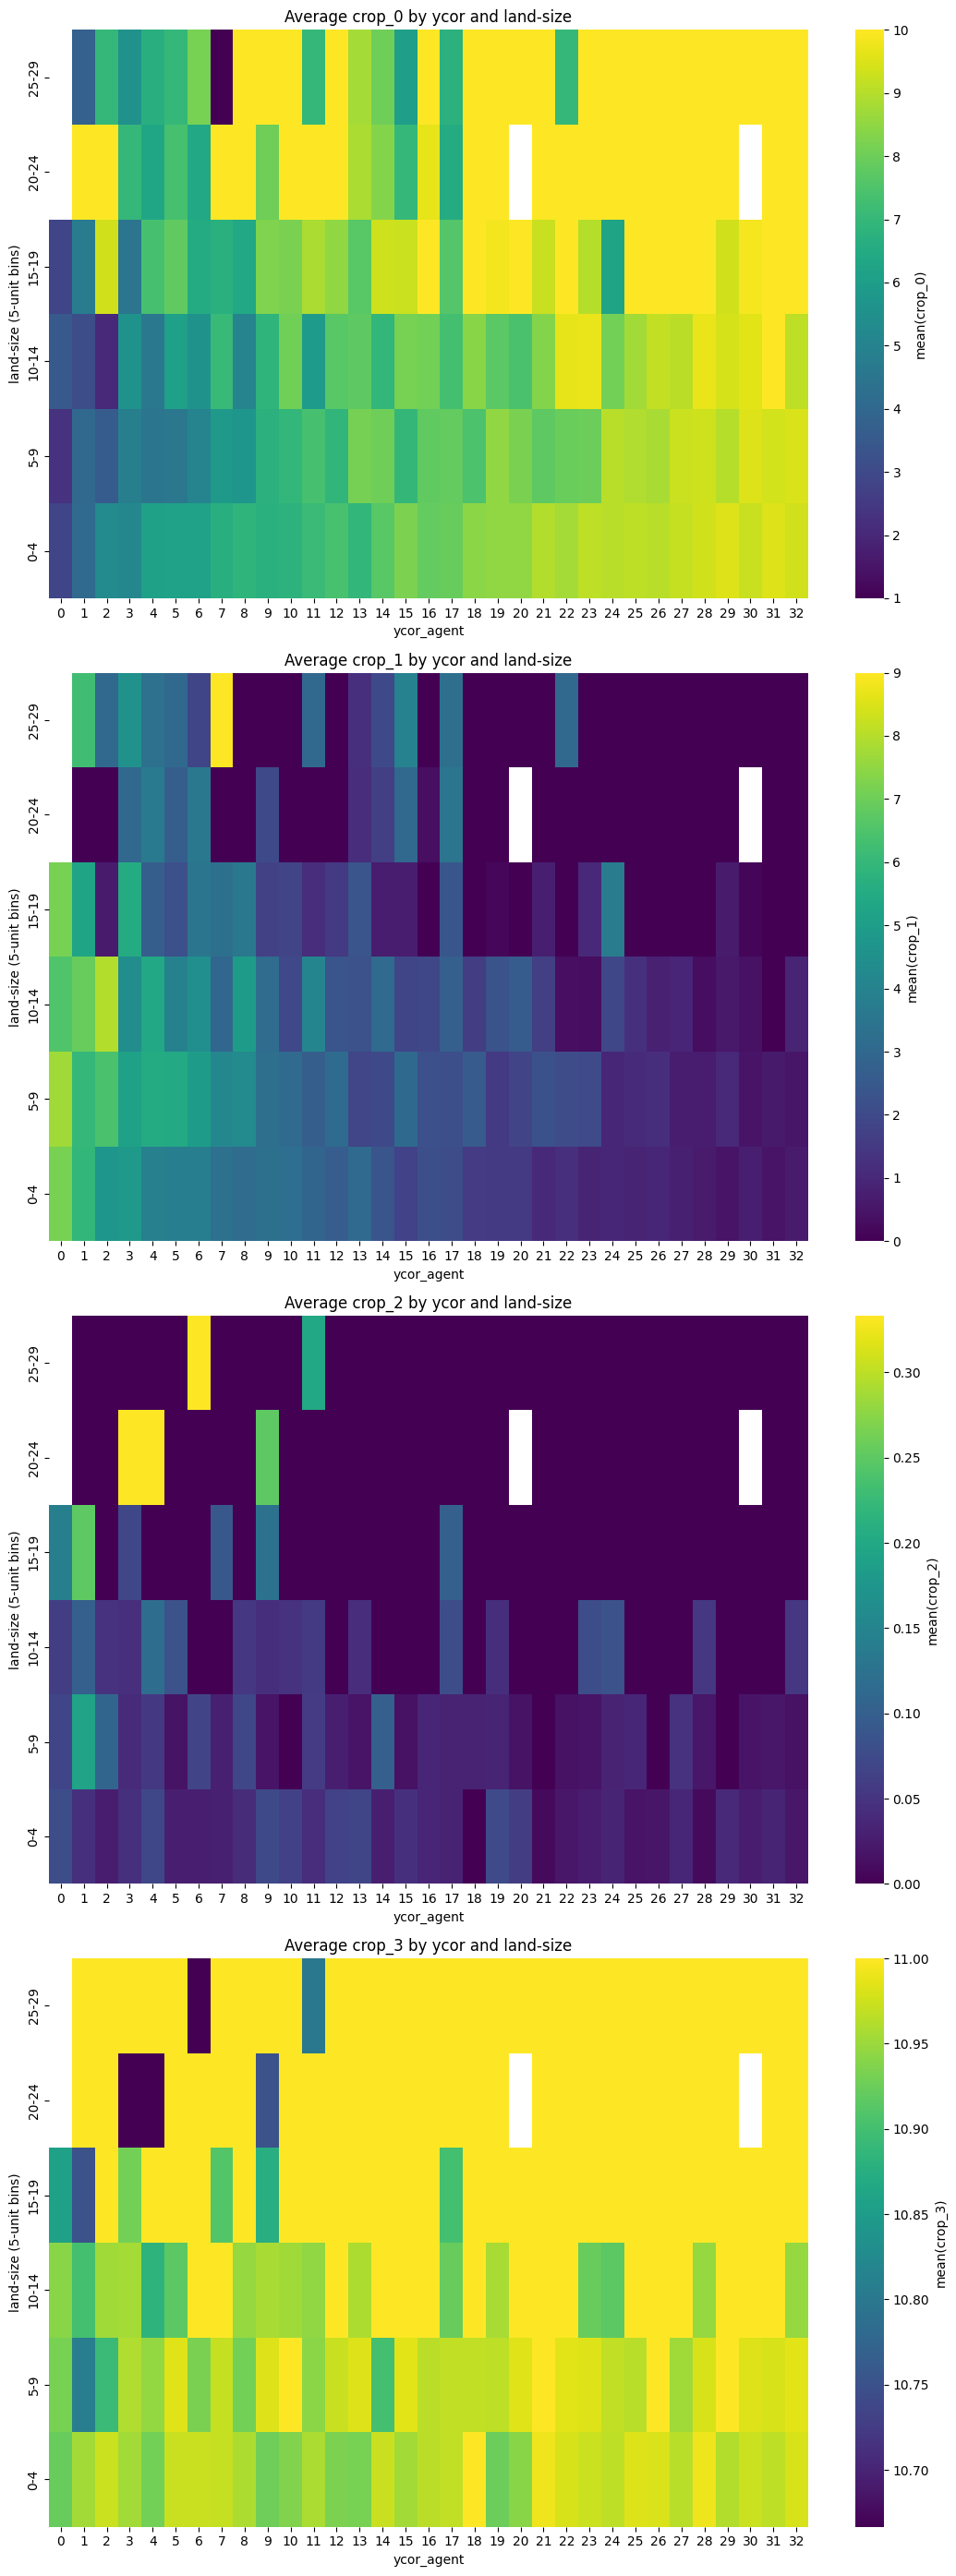

In [56]:
# Binned heatmaps for crop usage (4 positions)
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure crop columns exist (expand if not already present)
crop_cols = [f'crop_{i}' for i in range(4)]
if not all(c in df_farmer_details.columns for c in crop_cols):
    crops_expanded = pd.DataFrame(df_farmer_details['crops-used_agent'].tolist(), columns=crop_cols).fillna(0).astype(int)
    for c in crop_cols:
        df_farmer_details[c] = crops_expanded[c]

# Create land-size bins of width 5
min_land = int(df_farmer_details['land-size_agent'].min())
max_land = int(df_farmer_details['land-size_agent'].max())
bins = list(range((min_land // 5) * 5, ((max_land // 5) + 2) * 5, 5))
labels = [f"{b}-{b+4}" for b in bins[:-1]]
df_farmer_details['land_bin'] = pd.cut(df_farmer_details['land-size_agent'], bins=bins, labels=labels, right=False, include_lowest=True)

# Create one figure with 4x1 heatmaps (one per crop position)
fig, axes = plt.subplots(4, 1, figsize=(11, 7*4))
for i, c in enumerate(crop_cols):
    grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[c].mean().reset_index()
    pivot = grp.pivot(index='land_bin', columns='ycor_agent', values=c)
    pivot = pivot.reindex(labels)  # ensure all land bins present in order
    try:
        sorted_cols = sorted([col for col in pivot.columns if not pd.isna(col)])
        pivot = pivot[sorted_cols]
    except Exception:
        pass
    ax = axes[i] if len(crop_cols) > 1 else axes
    sns.heatmap(pivot, ax=ax, cmap='viridis', cbar_kws={'label': f'mean({c})'}, annot=False, fmt='.2f')
    ax.set_title(f'Average {c} by ycor and land-size')
    ax.set_xlabel('ycor_agent')
    ax.set_ylabel('land-size (5-unit bins)')
    ax.invert_yaxis()
plt.tight_layout()
plt.show()


Per-farmer correlations: ycor/land-size vs strategy positions
 ycor_agent vs strategy_0: 0.2250
 ycor_agent vs strategy_1: 0.5988
 ycor_agent vs strategy_2: -0.2391
 ycor_agent vs strategy_3: -0.4010
 land-size_agent vs strategy_0: -0.0032
 land-size_agent vs strategy_1: 0.1209
 land-size_agent vs strategy_2: 0.0492
 land-size_agent vs strategy_3: -0.0494


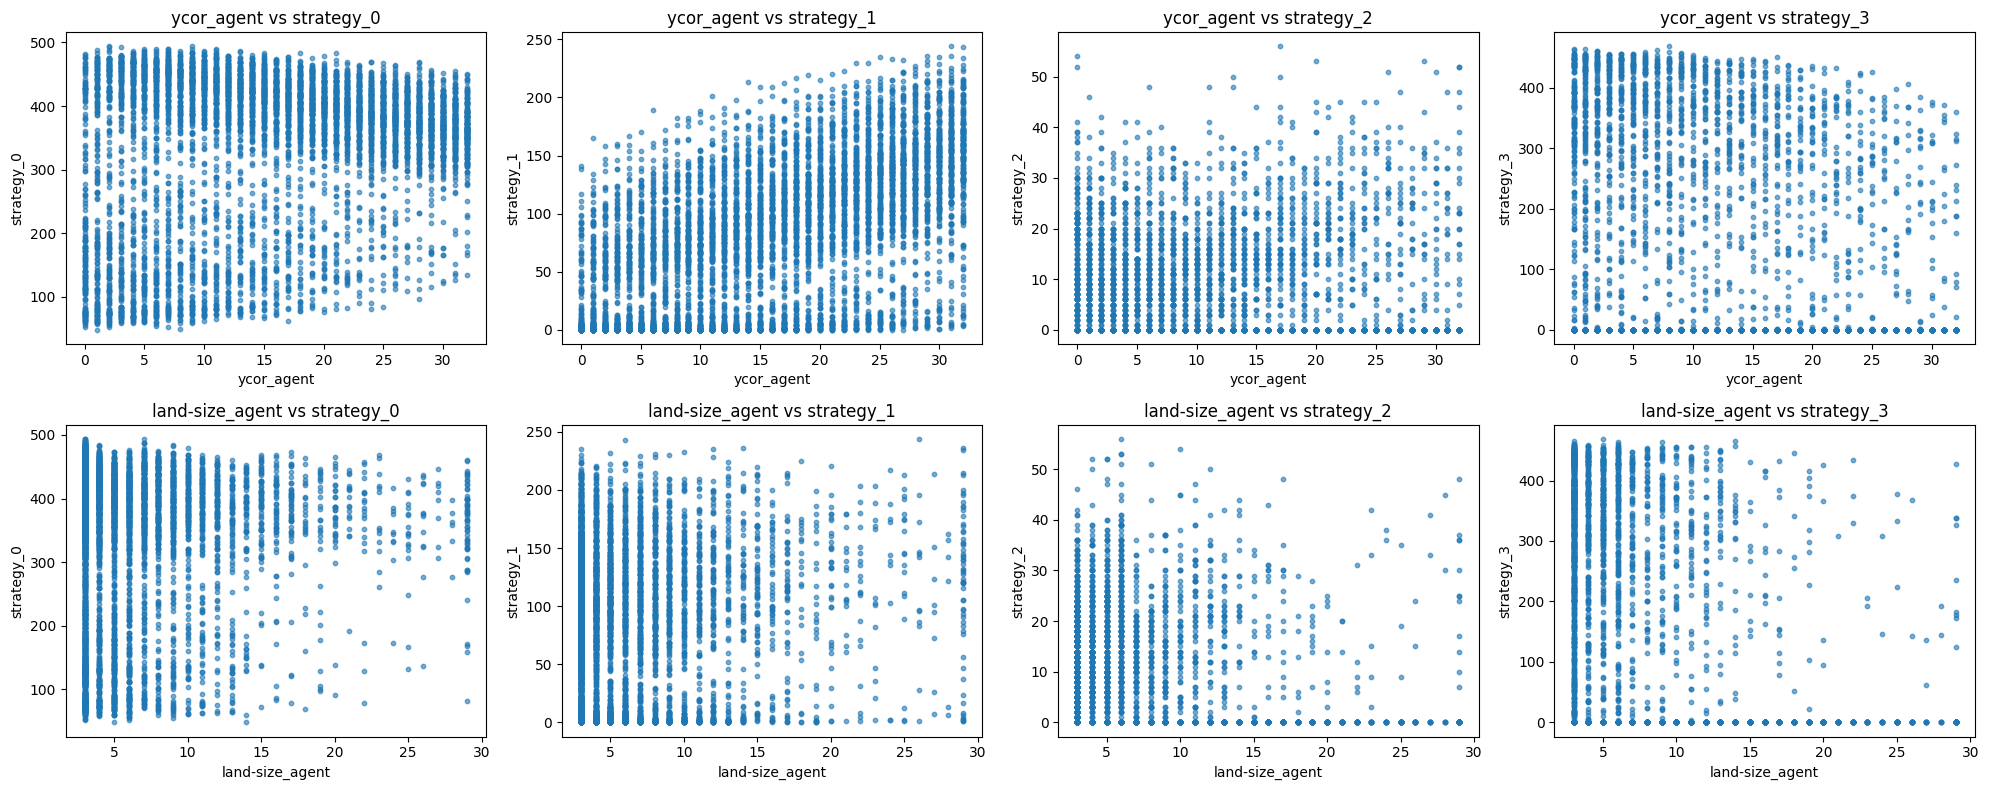

In [49]:
# --- Strategy usage per-position analysis (4 positions) ---
# Expand strategies-used_agent (each is a list of 4 values) into four columns and attach to df_farmer_details
strategy_cols = [f'strategy_{i}' for i in range(4)]
strategies_expanded = pd.DataFrame(df_farmer_details['strategies-used_agent'].tolist(), columns=strategy_cols).fillna(0).astype(int)
for s in strategy_cols:
    df_farmer_details[s] = strategies_expanded[s]

# Per-farmer correlations: ycor and land-size with each strategy position
farmer_vars = ['ycor_agent', 'land-size_agent']
print('\nPer-farmer correlations: ycor/land-size vs strategy positions')
for v in farmer_vars:
    for s in strategy_cols:
        corr = df_farmer_details[v].corr(df_farmer_details[s])
        print(f" {v} vs {s}: {corr:.4f}")

# Scattergrid: 2 rows (ycor, land-size) x 4 cols (strategy_0..strategy_3)
fig, axes = plt.subplots(2, len(strategy_cols), figsize=(5*len(strategy_cols), 8))
for i, v in enumerate(farmer_vars):
    for j, s in enumerate(strategy_cols):
        ax = axes[i, j] if len(strategy_cols) > 1 else axes[i]
        ax.scatter(df_farmer_details[v], df_farmer_details[s], s=10, alpha=0.6)
        ax.set_xlabel(v)
        ax.set_ylabel(s)
        ax.set_title(f"{v} vs {s}")
plt.tight_layout()
plt.show()

/tmp/ipykernel_5360/646113124.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[s].mean().reset_index()
/tmp/ipykernel_5360/646113124.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[s].mean().reset_index()
/tmp/ipykernel_5360/646113124.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = d

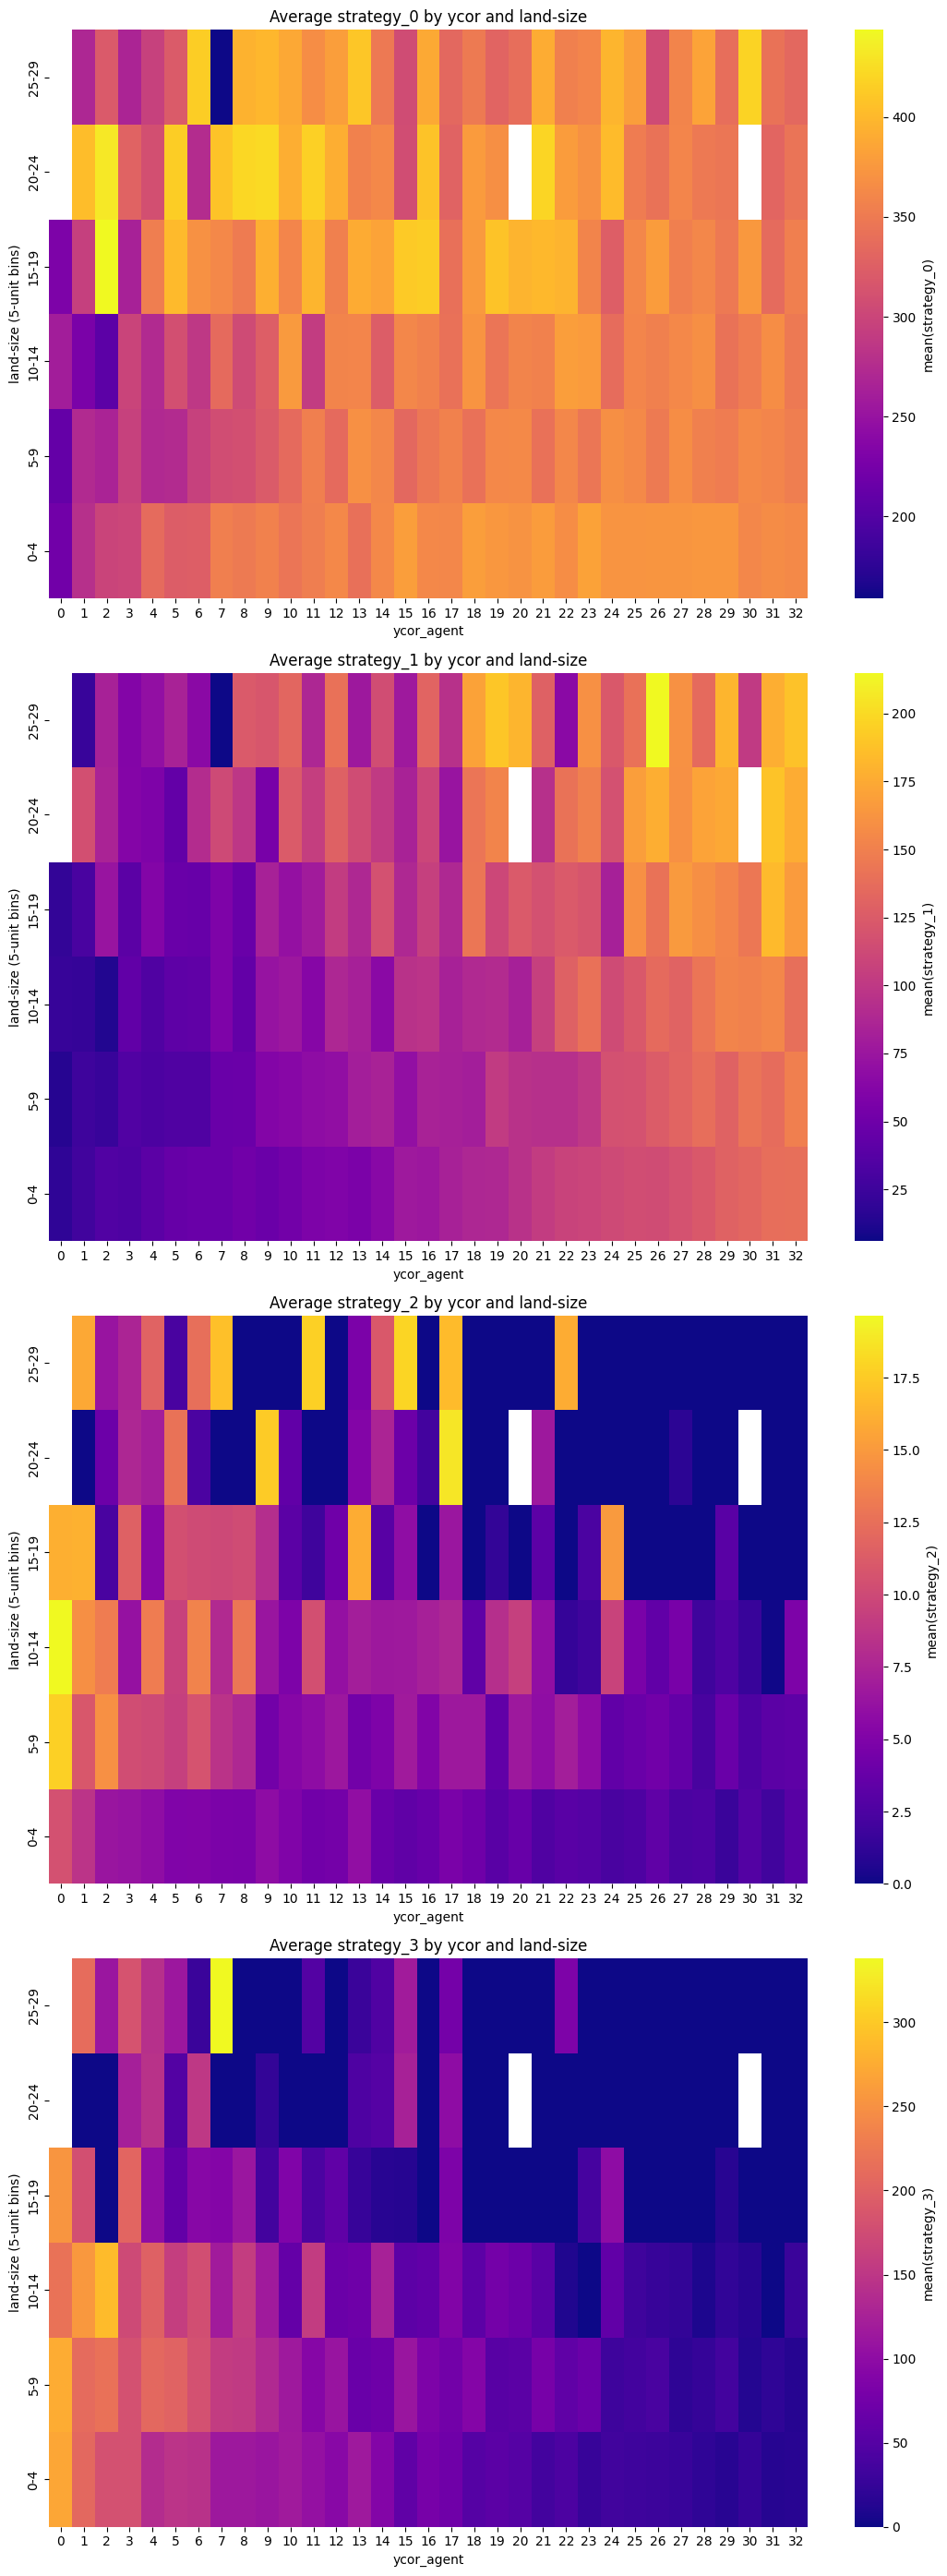

In [57]:
# Binned heatmaps for strategy usage (4 positions)
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure strategy columns exist (expand if not already present)
strategy_cols = [f'strategy_{i}' for i in range(4)]
if not all(s in df_farmer_details.columns for s in strategy_cols):
    strategies_expanded = pd.DataFrame(df_farmer_details['strategies-used_agent'].tolist(), columns=strategy_cols).fillna(0).astype(int)
    for s in strategy_cols:
        df_farmer_details[s] = strategies_expanded[s]

# Reuse land_bin if present, otherwise create
if 'land_bin' not in df_farmer_details.columns:
    min_land = int(df_farmer_details['land-size_agent'].min())
    max_land = int(df_farmer_details['land-size_agent'].max())
    bins = list(range((min_land // 5) * 5, ((max_land // 5) + 2) * 5, 5))
    labels = [f"{b}-{b+4}" for b in bins[:-1]]
    df_farmer_details['land_bin'] = pd.cut(df_farmer_details['land-size_agent'], bins=bins, labels=labels, right=False, include_lowest=True)
else:
    labels = sorted(df_farmer_details['land_bin'].cat.categories, key=lambda x: (int(str(x).split('-')[0]) if pd.notna(x) else 0))

# One figure with 4x1 heatmaps (one per strategy position)
fig, axes = plt.subplots(4, 1, figsize=(11, 7*4))
for i, s in enumerate(strategy_cols):
    grp = df_farmer_details.groupby(['land_bin', 'ycor_agent'])[s].mean().reset_index()
    pivot = grp.pivot(index='land_bin', columns='ycor_agent', values=s)
    pivot = pivot.reindex(labels)  # ensure ordered land bins
    try:
        sorted_cols = sorted([col for col in pivot.columns if not pd.isna(col)])
        pivot = pivot[sorted_cols]
    except Exception:
        pass
    ax = axes[i] if len(strategy_cols) > 1 else axes
    sns.heatmap(pivot, ax=ax, cmap='plasma', cbar_kws={'label': f'mean({s})'}, annot=False, fmt='.2f')
    ax.set_title(f'Average {s} by ycor and land-size')
    ax.set_xlabel('ycor_agent')
    ax.set_ylabel('land-size (5-unit bins)')
    ax.invert_yaxis()
plt.tight_layout()
plt.show()